In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import scipy as sci

%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\neroc\\Desktop\\DataAnalysis\\kaggle\\Predicting Bicycle Demand'

In [18]:
train = pd.read_csv("datasets/train.csv", parse_dates=["datetime"])
test = pd.read_csv("datasets/test.csv", parse_dates=["datetime"])

In [20]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [21]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [22]:
# 결측치 있는지 확인
# train.isna().sum()
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [23]:
print(train.columns)
print(test.columns)
common_columns = set(train.columns) & set(test.columns) #test에도 있는 columns만 사용하기 위해 공통으로 있는 column 정리
# common_columns.add("count") # test의 count를 예측하기 위한거라 test에는 count가 없지만 사용해야 하므로 추가

common_columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


{'atemp',
 'datetime',
 'holiday',
 'humidity',
 'season',
 'temp',
 'weather',
 'windspeed',
 'workingday'}

In [24]:
train = pd.concat([train.loc[:,common_columns], train.loc[:,"count"]], axis=1) # train에서 common column만 사용

In [25]:
train.head()

season  workingday  holiday  temp  windspeed            datetime  weather  \
0       1           0        0  9.84        0.0 2011-01-01 00:00:00        1   
1       1           0        0  9.02        0.0 2011-01-01 01:00:00        1   
2       1           0        0  9.02        0.0 2011-01-01 02:00:00        1   
3       1           0        0  9.84        0.0 2011-01-01 03:00:00        1   
4       1           0        0  9.84        0.0 2011-01-01 04:00:00        1   

    atemp  humidity  count  
0  14.395        81     16  
1  13.635        80     40  
2  13.635        80     32  
3  14.395        75     13  
4  14.395        75      1

In [17]:
train.drop(["datetime"], 1)

season  workingday  holiday   temp  windspeed  weather   atemp  \
0           1           0        0   9.84     0.0000        1  14.395   
1           1           0        0   9.02     0.0000        1  13.635   
2           1           0        0   9.02     0.0000        1  13.635   
3           1           0        0   9.84     0.0000        1  14.395   
4           1           0        0   9.84     0.0000        1  14.395   
5           1           0        0   9.84     6.0032        2  12.880   
6           1           0        0   9.02     0.0000        1  13.635   
7           1           0        0   8.20     0.0000        1  12.880   
8           1           0        0   9.84     0.0000        1  14.395   
9           1           0        0  13.12     0.0000        1  17.425   
10          1           0        0  15.58    16.9979        1  19.695   
11          1           0        0  14.76    19.0012        1  16.665   
12          1           0        0  17.22    19.0012        1  21.210   
13          1           0        0  18.86    19.9995        2  22.725   
14          1           0        0  18.86    19.0012        2  22.725   
15          1           0        0  18.04    19.9995        2  21.970   
16          1           0        0  17.22    19.9995        2  21.210   
17          1           0        0  18.04    19.0012        2  21.970   
18          1           0        0  17.22    16.9979        3  21.210   
19          1           0        0  17.22    16.9979        3  21.210   
20          1           0        0  16.40    16.9979        2  20.455   
21          1           0        0  16.40    12.9980        2  20.455   
22          1           0        0  16.40    15.0013        2  20.455   
23          1           0        0  18.86    19.9995        2  22.725   
24          1           0        0  18.86    19.9995        2  22.725   
25          1           0        0  18.04    16.9979        2  21.970   
26          1           0        0  17.22    19.0012        2  21.210   
27          1           0        0  18.86    12.9980        2  22.725   
28          1           0        0  18.86    12.9980        2  22.725   
29          1           0        0  17.22    19.9995        3  21.210   
...       ...         ...      ...    ...        ...      ...     ...   
10856       4           1        0  15.58    22.0028        1  19.695   
10857       4           1        0  15.58    26.0027        1  19.695   
10858       4           1        0  14.76    16.9979        1  16.665   
10859       4           1        0  14.76    15.0013        1  17.425   
10860       4           1        0  13.94     0.0000        1  16.665   
10861       4           1        0  13.94     6.0032        1  17.425   
10862       4           1        0  12.30     0.0000        1  15.910   
10863       4           1        0  12.30     6.0032        1  15.910   
10864       4           1        0  11.48     6.0032        1  15.150   
10865       4           1        0  10.66     8.9981        1  13.635   
10866       4           1        0   9.84     8.9981        1  12.120   
10867       4           1        0  10.66     6.0032        1  14.395   
10868       4           1        0   9.84     6.0032        1  12.880   
10869       4           1        0  10.66     8.9981        1  13.635   
10870       4           1        0   9.84     7.0015        1  12.880   
10871       4           1        0  11.48     7.0015        1  14.395   
10872       4           1        0  13.12     7.0015        1  16.665   
10873       4           1        0  16.40    15.0013        1  20.455   
10874       4           1        0  16.40    19.0012        1  20.455   
10875       4           1        0  17.22    12.9980        1  21.210   
10876       4           1        0  17.22    12.9980        1  21.210   
10877       4           1        0  17.22    19.0012        1  21.210   
10878       4           1        0  17.22    23.9994        1  21

In [44]:
# datetime을 연월일시분초로 분할
train["year"] = train.datetime.dt.year
train["month"] = train.datetime.dt.month
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
train["min"] = train.datetime.dt.minute
train["sec"] = train.datetime.dt.second

test["year"] = test.datetime.dt.year
test["month"] = test.datetime.dt.month
test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour
test["min"] = test.datetime.dt.minute
test["sec"] = test.datetime.dt.second

train = train.loc[:, train.columns != "datetime"]
test = test.loc[:, test.columns != "datetime"]

In [45]:
categorical_columns = ["holiday","season","workingday","weather", "year", "month", "day", "hour", "min", "sec"]
numerical_columns = list(set(train.columns) - set(categorical_columns))
# categorical variable을 category로 변환
for col in categorical_columns:
    train.loc[:,col] = train.loc[:,col].astype('category')
    test.loc[:,col] = test.loc[:,col].astype('category')

In [46]:
print(len(categorical_columns), len(numerical_columns))

10 5


C:\Users\neroc\Anaconda3\envs\DataAnalysis\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


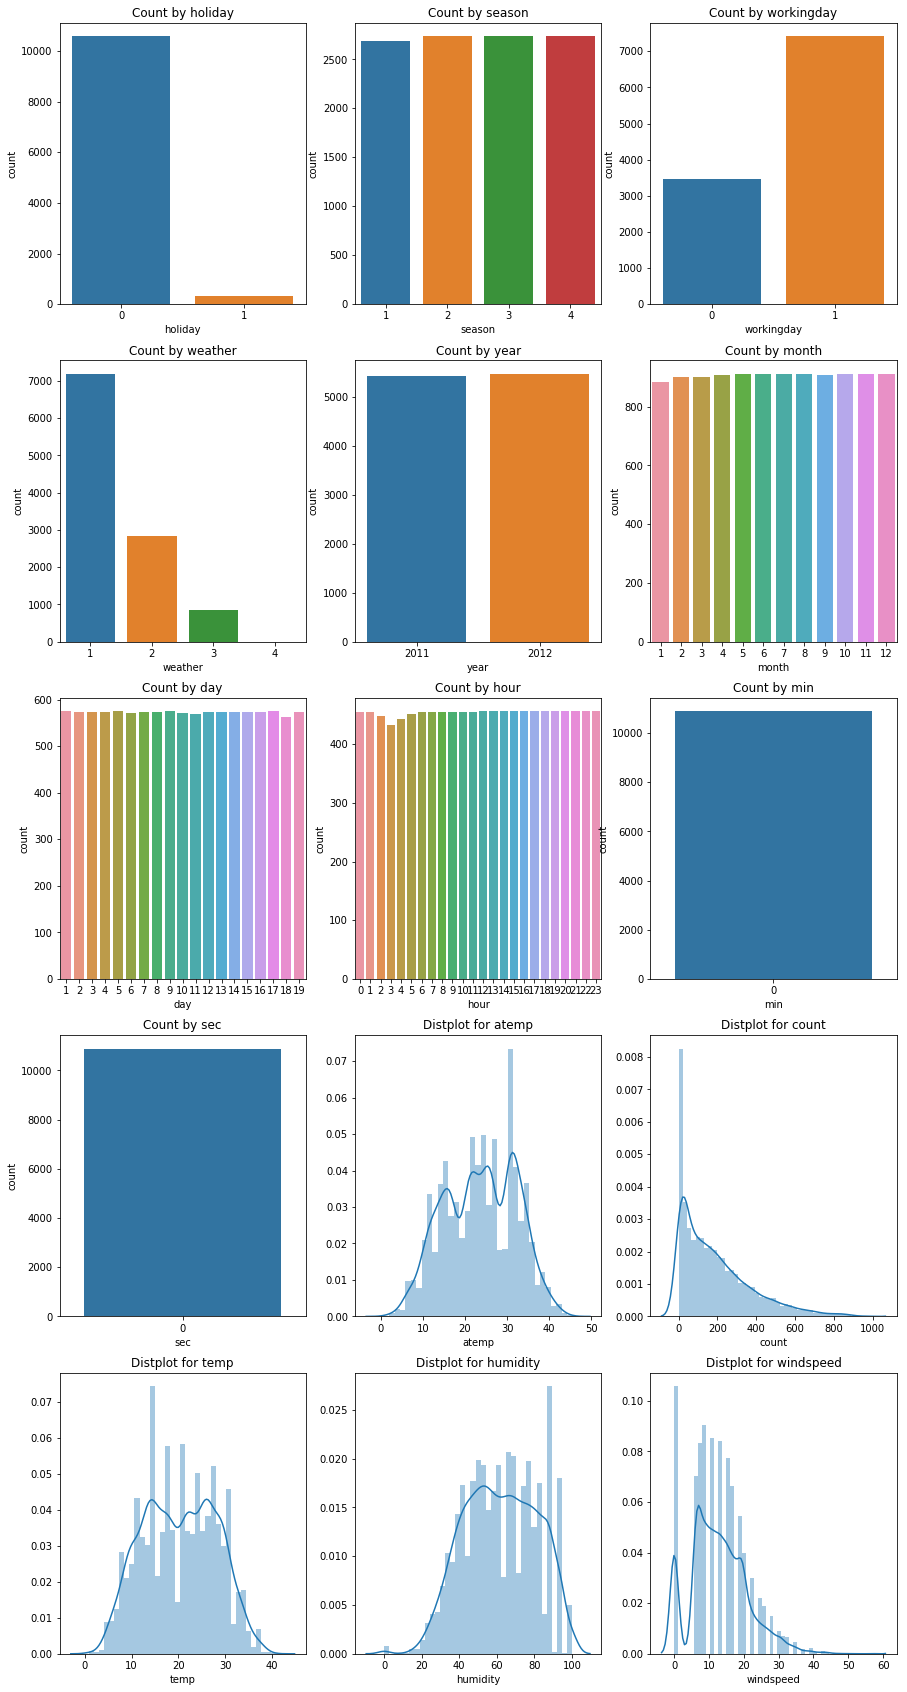

In [47]:
nrows = 5
ncols = 3
figure, axes = plt.subplots(nrows = nrows, ncols = ncols)
figure.set_size_inches(15,30)
# figure.set(title = "Frequency")


# Categorical varible 의 category별 frequency 비교
for i in range(len(categorical_columns)):
    row_index = i // ncols
    col_index = i % ncols
    sns.countplot(data = train, x = categorical_columns[i], ax = axes[row_index][col_index])
    axes[row_index][col_index].set_title("Count by " + categorical_columns[i])


# Numerical variable의 distribution
for i in range(len(numerical_columns)):
    row_index = (i + len(categorical_columns)) // ncols
    col_index = (i + len(categorical_columns)) % ncols
    sns.distplot(train[numerical_columns[i]], ax = axes[row_index][col_index])
    axes[row_index][col_index].set_title("Distplot for " + numerical_columns[i])

In [48]:
numerical_columns

['atemp', 'count', 'temp', 'humidity', 'windspeed']

C:\Users\neroc\Anaconda3\envs\DataAnalysis\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


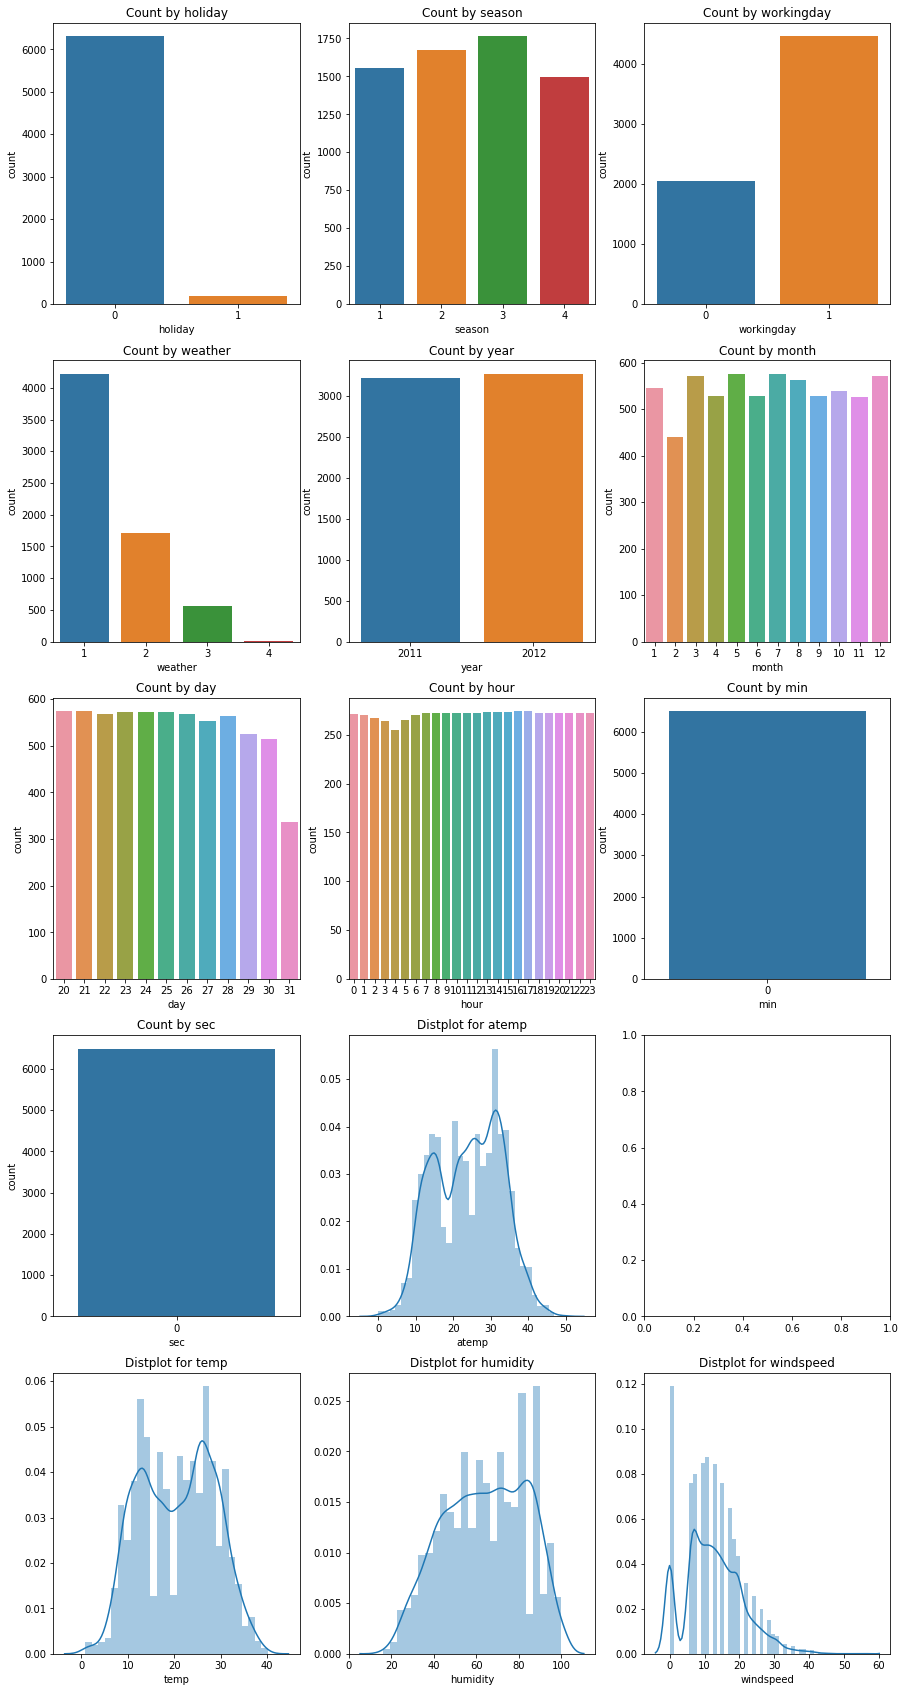

In [49]:
nrows = 5
ncols = 3
figure, axes = plt.subplots(nrows = nrows, ncols = ncols)
figure.set_size_inches(15,30)
# figure.set(title = "Frequency")


# Categorical varible 의 category별 frequency 비교
for i in range(len(categorical_columns)):
    row_index = i // ncols
    col_index = i % ncols
    sns.countplot(test[categorical_columns[i]], ax = axes[row_index][col_index])
    axes[row_index][col_index].set_title("Count by " + categorical_columns[i])


# Numerical variable의 distribution
for i in range(len(numerical_columns)):
    if i == 1:
        continue
    row_index = (i + len(categorical_columns)) // ncols
    col_index = (i + len(categorical_columns)) % ncols
    sns.distplot(test[numerical_columns[i]], ax = axes[row_index][col_index])
    axes[row_index][col_index].set_title("Distplot for " + numerical_columns[i])

In [50]:
train.head()

season   atemp weather  temp  windspeed  humidity holiday workingday  count  \
0      1  14.395       1  9.84        0.0        81       0          0     16   
1      1  13.635       1  9.02        0.0        80       0          0     40   
2      1  13.635       1  9.02        0.0        80       0          0     32   
3      1  14.395       1  9.84        0.0        75       0          0     13   
4      1  14.395       1  9.84        0.0        75       0          0      1   

   year month day hour min sec  
0  2011     1   1    0   0   0  
1  2011     1   1    1   0   0  
2  2011     1   1    2   0   0  
3  2011     1   1    3   0   0  
4  2011     1   1    4   0   0

105


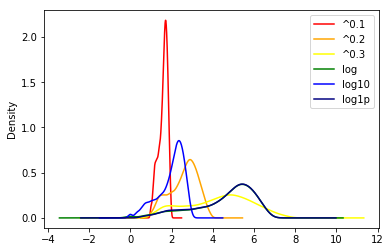

In [51]:
# count의 distplot이 왼쪽으로 skewed되어 있으므로 log변환이 필요하다
# windspeed의 값이 0인게 많은데 결측치로 생각할 수 있다
print(train["count"][train["count"] < 2].count()) # train set에서 count가 0인 값이 있는지 확인

np.power(train["count"], 0.1).plot(color="red", kind="density", )
np.power(train["count"], 0.2).plot(color="orange", kind="density")
np.power(train["count"], 0.3).plot(color="yellow", kind="density")
np.log(train["count"]).plot(color="green", kind="density")
np.log10(train["count"]).plot(color="blue", kind="density")
np.log1p(train["count"]).plot(color="navy", kind="density")
plt.legend(["^0.1","^0.2","^0.3","log","log10","log1p"])

In [52]:
# log변환이 가장 정규분포에 가까움
train_log = train.loc[:, train.columns != "count"]

In [53]:
train_log["log_count"] = np.log(train["count"])

In [54]:
train.head()

season   atemp weather  temp  windspeed  humidity holiday workingday  count  \
0      1  14.395       1  9.84        0.0        81       0          0     16   
1      1  13.635       1  9.02        0.0        80       0          0     40   
2      1  13.635       1  9.02        0.0        80       0          0     32   
3      1  14.395       1  9.84        0.0        75       0          0     13   
4      1  14.395       1  9.84        0.0        75       0          0      1   

   year month day hour min sec  
0  2011     1   1    0   0   0  
1  2011     1   1    1   0   0  
2  2011     1   1    2   0   0  
3  2011     1   1    3   0   0  
4  2011     1   1    4   0   0

In [55]:
corr = train.loc[:, train.columns != "log_count"].corr()
corr[np.abs(corr) > 0.1]

atemp      temp  windspeed  humidity     count
atemp      1.000000  0.984948        NaN       NaN  0.389784
temp       0.984948  1.000000        NaN       NaN  0.394454
windspeed       NaN       NaN   1.000000 -0.318607  0.101369
humidity        NaN       NaN  -0.318607  1.000000 -0.317371
count      0.389784  0.394454   0.101369 -0.317371  1.000000

In [56]:
# wind speed와 다른 변수들간의 상관관계가 낮기 때문에 최빈값으로 imputation, sklearn에 imputer 활용해 볼 것
# 상관관계가 있다면 회귀나 다른 방법을 고려해야 할 것
# humidity와 음의 상관관계가 있으므로 회귀 사용해야 더 정확 18-06-08

train["windspeed"].value_counts().iloc[:2,]

0.0000    1313
8.9981    1120
Name: windspeed, dtype: int64

In [57]:
windspeed_mode = 8.9981
train.loc[train["windspeed"] == 0, "windspeed"] = windspeed_mode
test.loc[test["windspeed"] == 0, "windspeed"] = windspeed_mode

In [58]:
corr = train.loc[:, train.columns != "log_count"].corr()
corr

atemp      temp  windspeed  humidity     count
atemp      1.000000  0.984948  -0.064894 -0.043536  0.389784
temp       0.984948  1.000000  -0.029845 -0.064949  0.394454
windspeed -0.064894 -0.029845   1.000000 -0.326428  0.093629
humidity  -0.043536 -0.064949  -0.326428  1.000000 -0.317371
count      0.389784  0.394454   0.093629 -0.317371  1.000000

In [59]:
# atemp와 temp의 상관계수가 높으므로 atemp는 삭제
# humidity와 windspeed간의 상관관계가 크게 변하지 않았으므로 최빈값 대체한 거 사용해도 괜찮을 듯
train = train.drop(["atemp"], axis=1)
test = test.drop(["atemp"], axis=1)

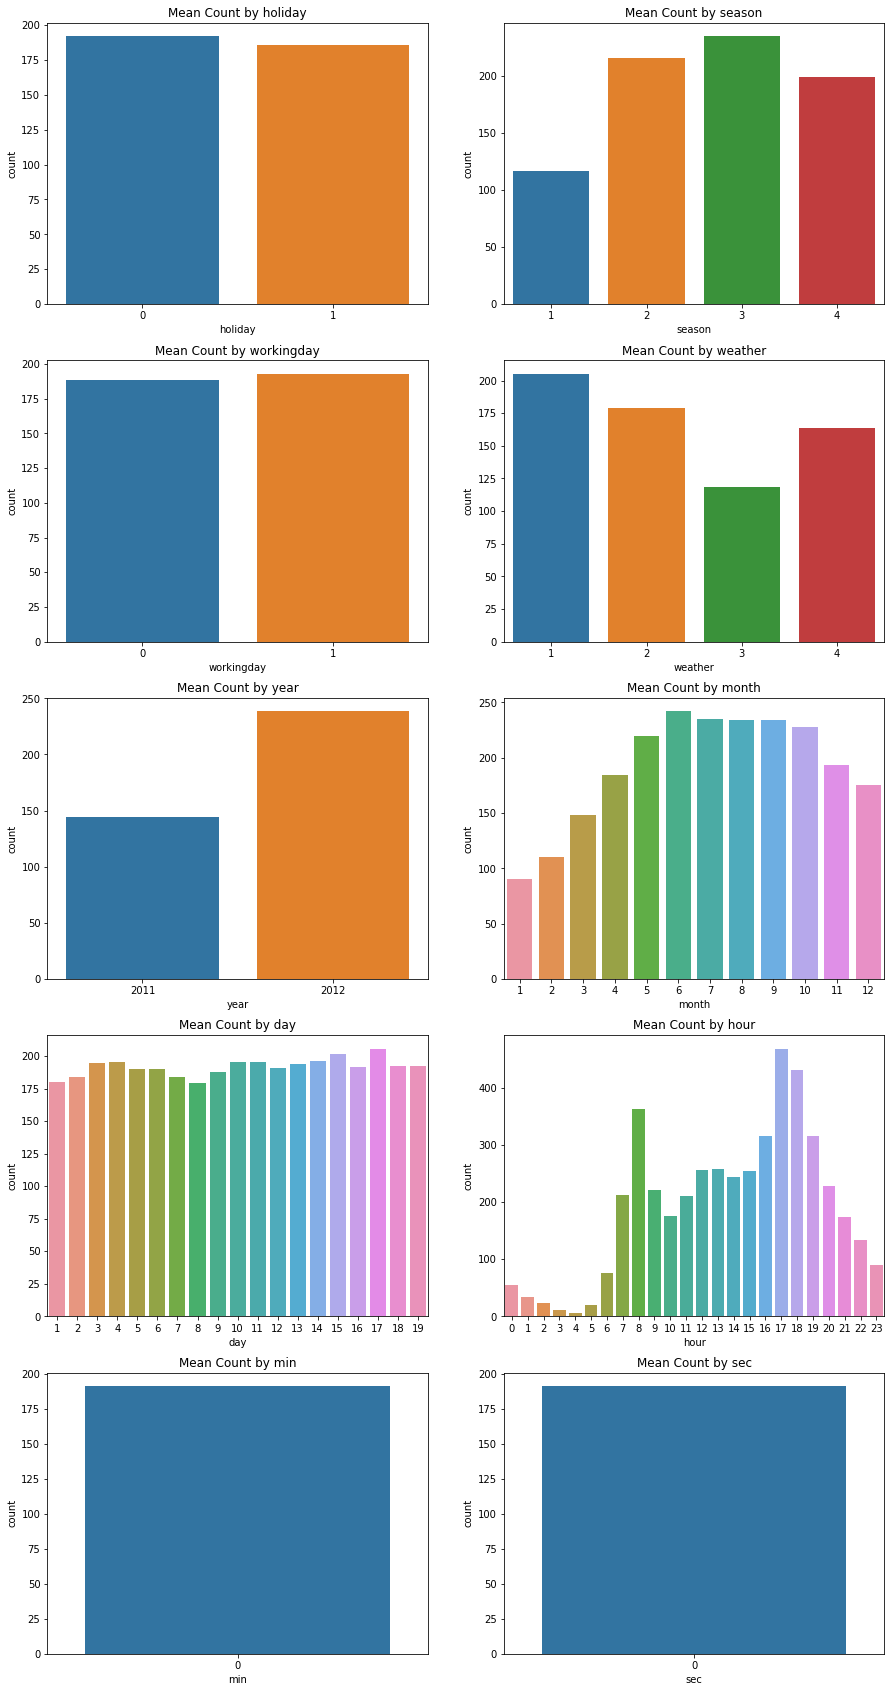

In [60]:
ncols = 2
nrows = 5
figure, axes = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(15,30)

for i in range(len(categorical_columns)):
    sns.barplot(data = train, x = categorical_columns[i], y = "count", ax = axes[i // ncols][i % ncols], ci=None) # ci = confidence interval
    axes[i // ncols][i % ncols].set(ylabel="count", xlabel=categorical_columns[i], title="Mean Count by " + categorical_columns[i])

In [61]:
# test set에 19일 이전의 data가 있는지 확인 => 없음, day가 categorical로 바껴서 에러뜸, 고치기
# test["day"][test["day"] < 20].count()

In [62]:
# 분, 초는 의미가 없으므로 삭제, train set에 day는 19일까지 밖에 없고 test set에 20일 이후가 있으므로 의미있게 사용할 수 없으므로 삭제
# holiday랑 workingday도 count에 별 차이가 없어보이므로 삭제,  t-test를 해야 좀 더 정확
drop_list = ["min", "sec", "day", "holiday", "workingday"] # 삭제할 column list
categorical_columns = list(set(categorical_columns) - set(drop_list))
train = train.drop(drop_list, axis=1)
test = test.drop(drop_list, axis=1)

In [63]:
#check_independence_list = ["season","weather","year","month","hour"] # check할 categorical variable들 목록
p_val_mat = np.zeros((len(categorical_columns),len(categorical_columns))) # 빈 matrix 생성

for i in range(len(check_independence_list)):
    for j in range(i+1, len(check_independence_list)):
        table = pd.crosstab(train[check_independence_list[i]], train[check_independence_list[j]])
        p_value = sci.stats.chi2_contingency(table)[1] # p-value
        p_val_mat[i][j] = p_value
        print("p-value of independence test between " + check_independence_list[i]
              + " and " + check_independence_list[j] + " : " + "%.10f" %p_value) # p-value가 낮으면 두 변수가 독립이 아니다.
        
pd.DataFrame(np.round(p_val_mat, 4), index=categorical_columns, columns=categorical_columns)
# seanson-weather, season-month, weather-month, weather-hour가 서로 관련이 있는 것으로 나온다 => 나중에 interaction 추가

NameError: name 'check_independence_list' is not defined

In [ ]:
train_dummy = pd.get_dummies(train) # categorical variable을 dummy화
test_dummy = pd.get_dummies(test)

In [ ]:
train_log.to_csv("datasets/train_log_EDA.csv", index=False)
train_dummy.to_csv("datasets/train_dummy_EDA.csv", index=False)
train.to_csv("datasets/train_EDA.csv", index=False)
test.to_csv("datasets/test_EDA.csv", index=False)
test_dummy.to_csv("datasets/test_dummy_EDA.csv", index=False)

In [ ]:
train_dummy.head()

In [ ]:
train.head()

In [ ]:
ncols = 2
nrows = 5
figure, axes = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(15,30)

for i in range(len(categorical_columns)):
    sns.barplot(data = test, x = categorical_columns[i], y = "humidity", ax = axes[i // ncols][i % ncols], ci=None) # ci = confidence interval
    axes[i // ncols][i % ncols].set(ylabel="count", xlabel=categorical_columns[i], title="Mean Count by " + categorical_columns[i])

In [2]:
?pd.concat